In [82]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import SVG
  
# fetch dataset 
parkinsons_telemonitoring = fetch_ucirepo(id=189) 
  
# data (as pandas dataframes) 
X = parkinsons_telemonitoring.data.features 
y = parkinsons_telemonitoring.data.targets
yM = parkinsons_telemonitoring.data.targets['motor_UPDRS']
yT = parkinsons_telemonitoring.data.targets['total_UPDRS']

In [83]:
# metadata 
print(parkinsons_telemonitoring.metadata) 
  


# variable information 
print(parkinsons_telemonitoring.variables) 

{'uci_id': 189, 'name': 'Parkinsons Telemonitoring', 'repository_url': 'https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring', 'data_url': 'https://archive.ics.uci.edu/static/public/189/data.csv', 'abstract': "Oxford Parkinson's Disease Telemonitoring Dataset", 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 5875, 'num_features': 19, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['motor_UPDRS', 'total_UPDRS'], 'index_col': ['subject#'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5ZS3N', 'creators': ['Athanasios Tsanas', 'Max Little'], 'intro_paper': {'title': "Accurate Telemonitoring of Parkinson's Disease Progression by Noninvasive Speech Tests", 'authors': 'A. Tsanas, Max A. Little, P. McSharry, L. Ramig', 'published_in': 'IEEE Transactions on Biomedical Engineering', 

In [84]:
#Overview of the Data:
#Explore the basic information about your dataset.

# Display the first few rows of the dataset
print(X.head())

   age  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0   72     5.6431    0.00662     0.000034     0.00401      0.00317   
1   72    12.6660    0.00300     0.000017     0.00132      0.00150   
2   72    19.6810    0.00481     0.000025     0.00205      0.00208   
3   72    25.6470    0.00528     0.000027     0.00191      0.00264   
4   72    33.6420    0.00335     0.000020     0.00093      0.00130   

   Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0     0.01204  0.02565        0.230       0.01438       0.01309   
1     0.00395  0.02024        0.179       0.00994       0.01072   
2     0.00616  0.01675        0.181       0.00734       0.00844   
3     0.00573  0.02309        0.327       0.01106       0.01265   
4     0.00278  0.01703        0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  \
0        0.01662      0.04314  0.014290  21.640  0.41888  0.54842  0.16006   
1        0.01689    

In [85]:
# Get a summary of the dataset
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   test_time      5875 non-null   float64
 2   Jitter(%)      5875 non-null   float64
 3   Jitter(Abs)    5875 non-null   float64
 4   Jitter:RAP     5875 non-null   float64
 5   Jitter:PPQ5    5875 non-null   float64
 6   Jitter:DDP     5875 non-null   float64
 7   Shimmer        5875 non-null   float64
 8   Shimmer(dB)    5875 non-null   float64
 9   Shimmer:APQ3   5875 non-null   float64
 10  Shimmer:APQ5   5875 non-null   float64
 11  Shimmer:APQ11  5875 non-null   float64
 12  Shimmer:DDA    5875 non-null   float64
 13  NHR            5875 non-null   float64
 14  HNR            5875 non-null   float64
 15  RPDE           5875 non-null   float64
 16  DFA            5875 non-null   float64
 17  PPE            5875 non-null   float64
 18  sex     

In [86]:
# Check for missing values
print(X.isnull().sum())

age              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
sex              0
dtype: int64


In [87]:
# Display the first few rows of the dataset
print(y.head())

# Get a summary of the dataset
print(y.info())

# Check for missing values
print(y.isnull().sum())

   motor_UPDRS  total_UPDRS
0       28.199       34.398
1       28.447       34.894
2       28.695       35.389
3       28.905       35.810
4       29.187       36.375
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   motor_UPDRS  5875 non-null   float64
 1   total_UPDRS  5875 non-null   float64
dtypes: float64(2)
memory usage: 91.9 KB
None
motor_UPDRS    0
total_UPDRS    0
dtype: int64


In [88]:
print(X.describe())
print(X.shape)

               age    test_time    Jitter(%)  Jitter(Abs)   Jitter:RAP  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     64.804936    92.863722     0.006154     0.000044     0.002987   
std       8.821524    53.445602     0.005624     0.000036     0.003124   
min      36.000000    -4.262500     0.000830     0.000002     0.000330   
25%      58.000000    46.847500     0.003580     0.000022     0.001580   
50%      65.000000    91.523000     0.004900     0.000034     0.002250   
75%      72.000000   138.445000     0.006800     0.000053     0.003290   
max      85.000000   215.490000     0.099990     0.000446     0.057540   

       Jitter:PPQ5   Jitter:DDP      Shimmer  Shimmer(dB)  Shimmer:APQ3  \
count  5875.000000  5875.000000  5875.000000  5875.000000   5875.000000   
mean      0.003277     0.008962     0.034035     0.310960      0.017156   
std       0.003732     0.009371     0.025835     0.230254      0.013237   
min       0.000430     0.000980  

In [89]:
print(y.describe())
print(y.shape)


       motor_UPDRS  total_UPDRS
count  5875.000000  5875.000000
mean     21.296229    29.018942
std       8.129282    10.700283
min       5.037700     7.000000
25%      15.000000    21.371000
50%      20.871000    27.576000
75%      27.596500    36.399000
max      39.511000    54.992000
(5875, 2)


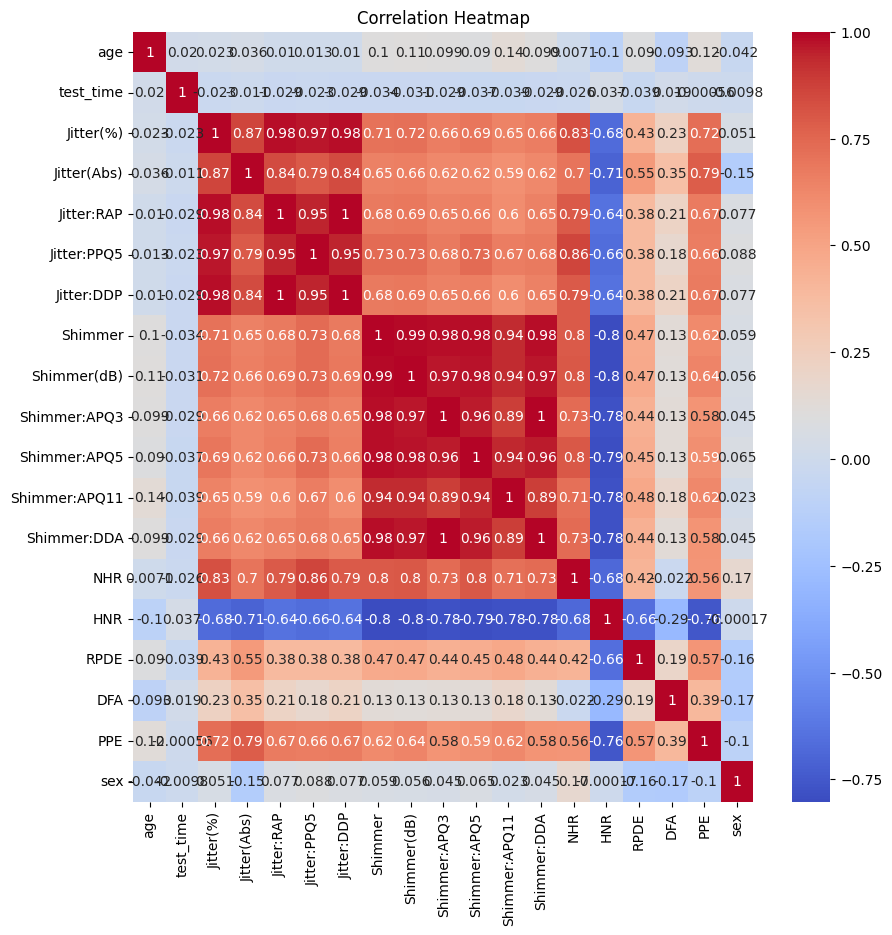

In [90]:
correlation_matrix = X.corr()
# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Data splicing

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
XM_train, XM_test, yM_train, yM_test = train_test_split(X, yM, test_size=0.2, random_state=0)
XT_train, XT_test, yT_train, yT_test = train_test_split(X, yT, test_size=0.2, random_state=0)

Basic Regression

In [92]:
model = LinearRegression()
model.fit(X_train, y_train) # training the model
y_pred = model.predict(X_test)

model.fit(XM_train, yM_train) # training the model
yM_pred = model.predict(XM_test)

model.fit(XT_train, yT_train) 
yT_pred = model.predict(XT_test)


In [93]:
# compute performance metrics
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error motor_UPDRS =", round(np.sqrt(metrics.mean_squared_error(yM_test, yM_pred)), 2))
print("Root Mean Squared Error total_UPDRS =", round(np.sqrt(metrics.mean_squared_error(yT_test, yT_pred)), 2))
print("Root Mean Squared Error =", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

Mean absolute error = 7.18
Mean squared error = 75.95
Root Mean Squared Error motor_UPDRS = 7.54
Root Mean Squared Error total_UPDRS = 9.75
Root Mean Squared Error = 8.71
R2 score = 0.14


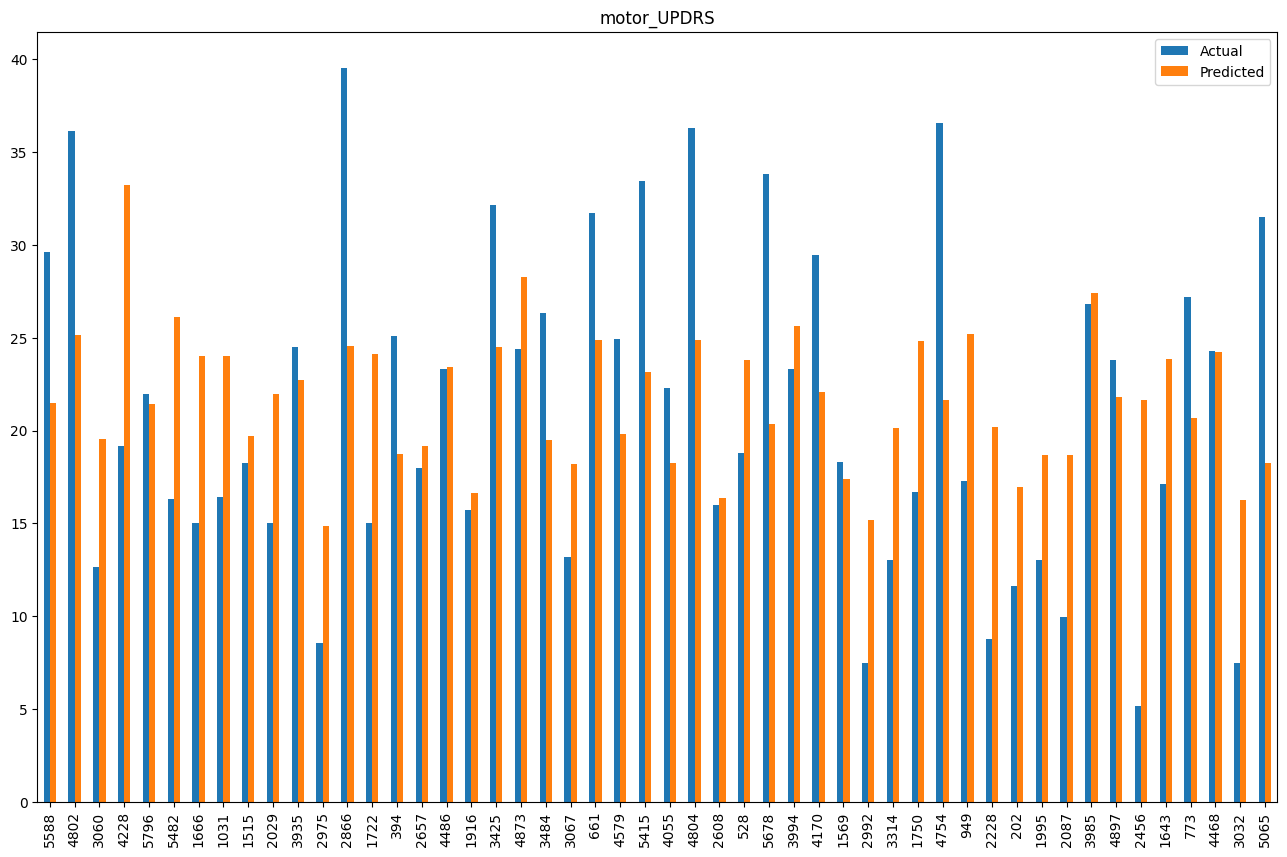

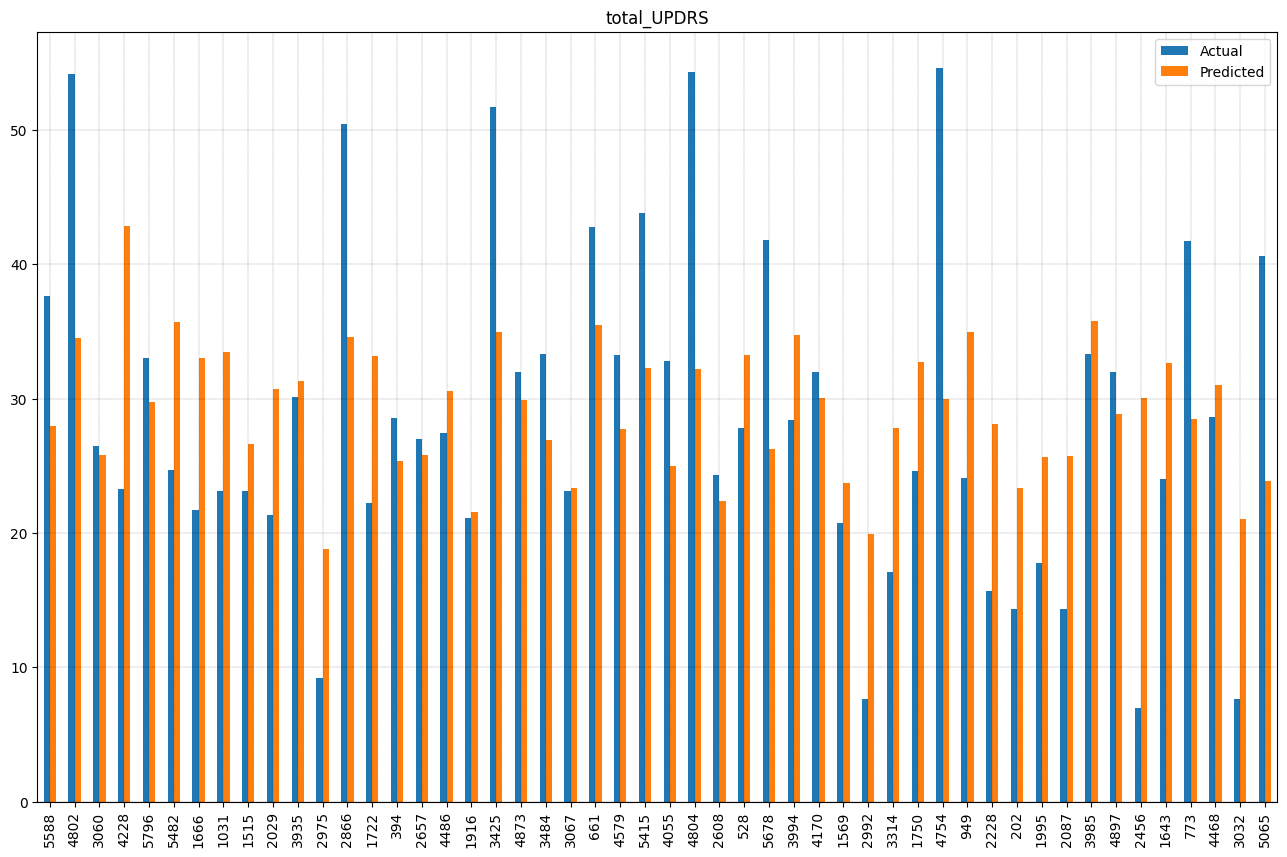

In [94]:
compareM_df = pd.DataFrame({'Actual': yM_test, 'Predicted': yM_pred.flatten()}).head(50)
compareM_df.plot(kind='bar', figsize=(16,10))
plt.title("motor_UPDRS")

compareT_df = pd.DataFrame({'Actual': yT_test, 'Predicted': yT_pred.flatten()}).head(50)
compareT_df.plot(kind='bar', figsize=(16,10))
plt.title("total_UPDRS")

plt.grid(linestyle=':', linewidth='0.25', color='black')
plt.show()

Eerste ML van ScikitLearn library: DecisionTreeRegressor

In [95]:
from sklearn.tree import DecisionTreeRegressor

   - `DecisionTreeRegressor` is a regression model based on decision trees. Unlike classification trees that predict class labels, decision tree regressors predict a continuous numerical value. They work by recursively splitting the dataset into subsets based on the values of input features to minimize the variance of the target variable.
   - Decision tree regressors make binary decisions at each node, which leads to a tree structure. At each leaf node, a regression prediction is made based on the average (or another criterion) of the target values in that leaf.
   - Decision tree regressors can be prone to overfitting, but this can be controlled by limiting the depth of the tree, setting a minimum number of samples required to split a node, and other hyperparameters.

In [96]:
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train) # training the model
y_pred = model.predict(X_test)

model.fit(XM_train, yM_train) # training the model
yM_pred = model.predict(XM_test)

model.fit(XT_train, yT_train) 
yT_pred = model.predict(XT_test)


# compute performance metrics
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error motor_UPDRS =", round(np.sqrt(metrics.mean_squared_error(yM_test, yM_pred)), 2))
print("Root Mean Squared Error total_UPDRS =", round(np.sqrt(metrics.mean_squared_error(yT_test, yT_pred)), 2))
print("Root Mean Squared Error =", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.53
Mean squared error = 4.95
Root Mean Squared Error motor_UPDRS = 2.74
Root Mean Squared Error total_UPDRS = 3.36
Root Mean Squared Error = 2.22
R2 score = 0.94


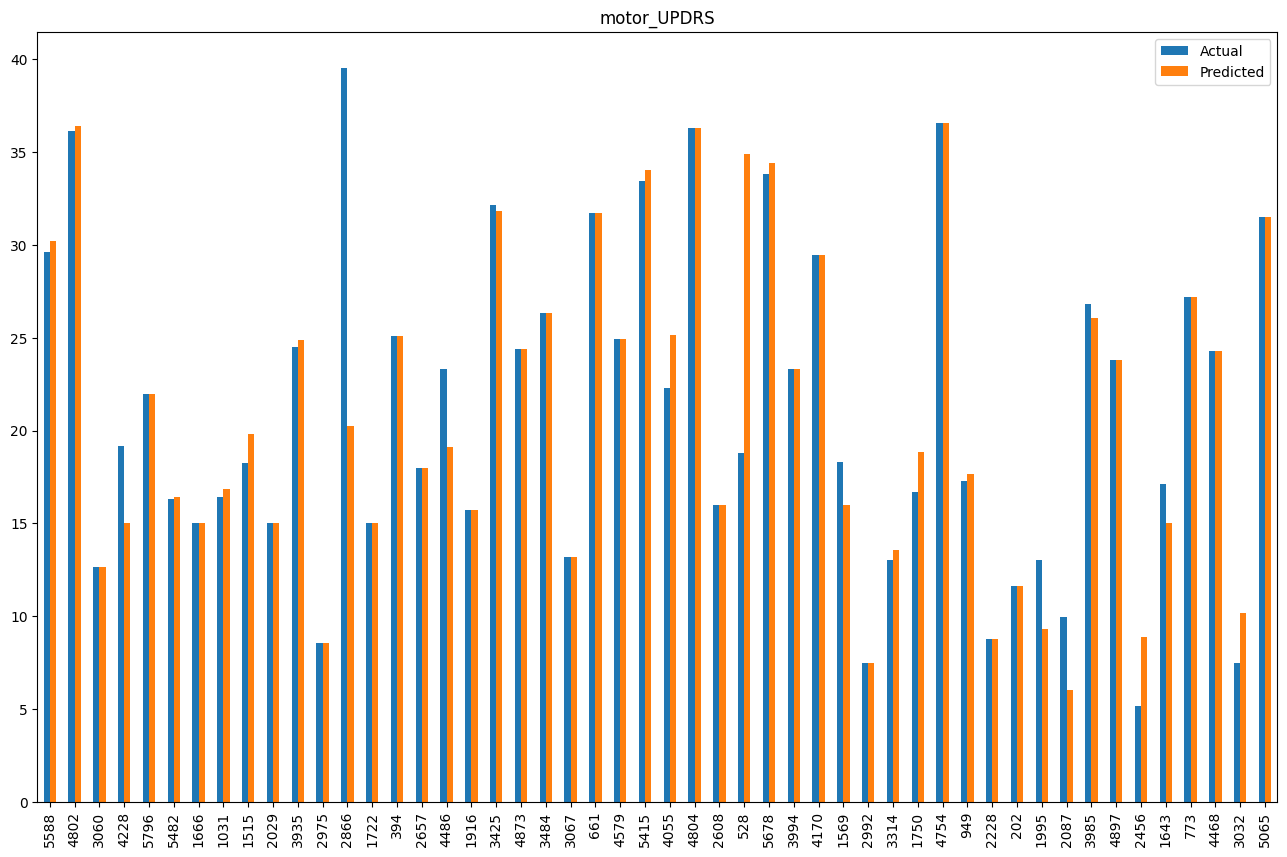

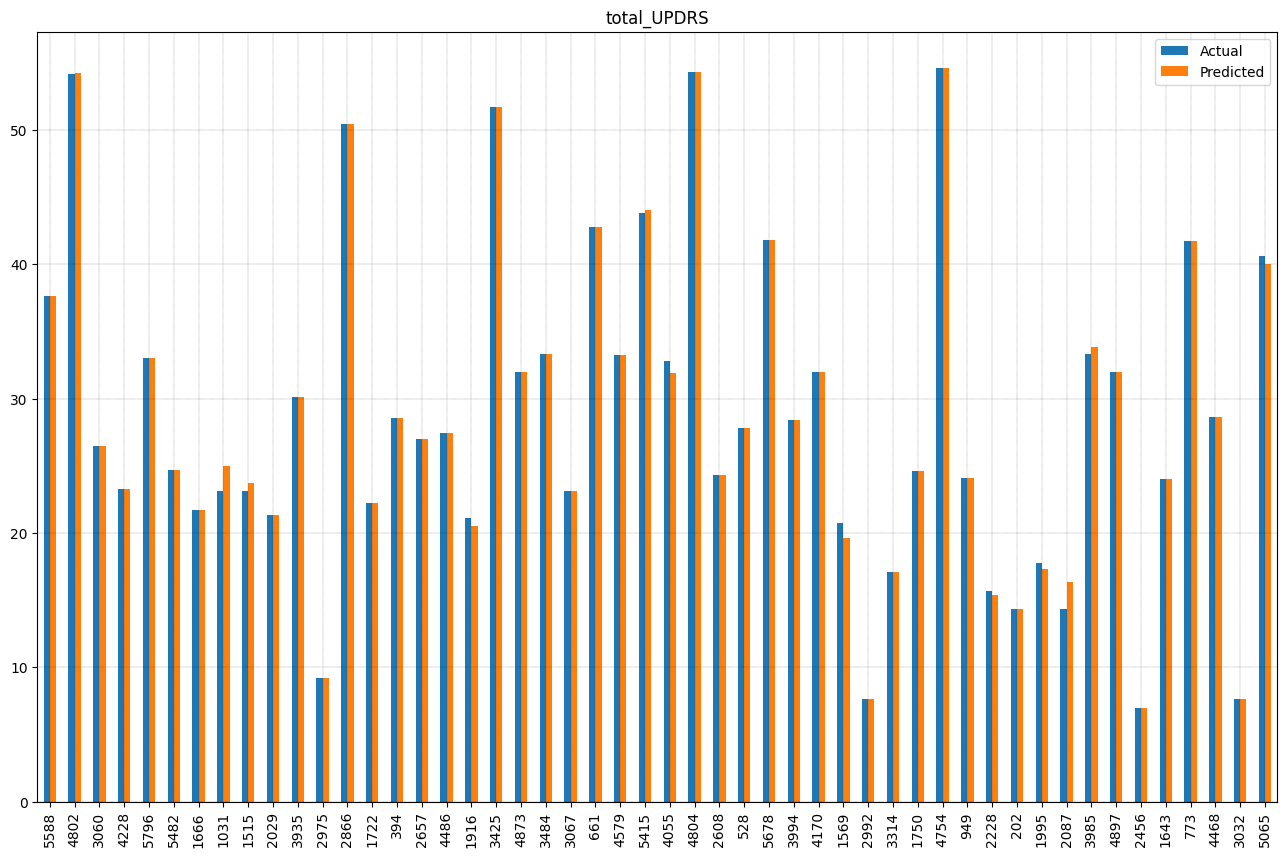

In [97]:
compareM_df = pd.DataFrame({'Actual': yM_test, 'Predicted': yM_pred.flatten()}).head(50)
compareM_df.plot(kind='bar', figsize=(16,10))
plt.title("motor_UPDRS")

compareT_df = pd.DataFrame({'Actual': yT_test, 'Predicted': yT_pred.flatten()}).head(50)
compareT_df.plot(kind='bar', figsize=(16,10))
plt.title("total_UPDRS")

plt.grid(linestyle=':', linewidth='0.25', color='black')
plt.show()

Tweede ML van ScikitLearn library

random forest regressor

In [98]:
from sklearn.neighbors import KNeighborsRegressor

sklearn.neighbors.KNeighborsRegressor is a machine learning model in scikit-learn (sklearn) that performs regression by predicting the target value of a data point based on the values of its nearest neighbors. It uses the k-nearest neighbors algorithm to make predictions, where k is a user-defined parameter specifying the number of neighbors to consider. This model is often used for tasks like regression analysis and can be effective for non-linear relationships between features and target values.

In [99]:
model = KNeighborsRegressor()
model.fit(X_train, y_train) # training the model
y_pred = model.predict(X_test)

model.fit(XM_train, yM_train) # training the model
yM_pred = model.predict(XM_test)

model.fit(XT_train, yT_train) 
yT_pred = model.predict(XT_test)

# compute performance metrics
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error motor_UPDRS =", round(np.sqrt(metrics.mean_squared_error(yM_test, yM_pred)), 2))
print("Root Mean Squared Error total_UPDRS =", round(np.sqrt(metrics.mean_squared_error(yT_test, yT_pred)), 2))
print("Root Mean Squared Error =", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

Mean absolute error = 5.02
Mean squared error = 47.25
Root Mean Squared Error motor_UPDRS = 5.9
Root Mean Squared Error total_UPDRS = 7.72
Root Mean Squared Error = 6.87
R2 score = 0.47


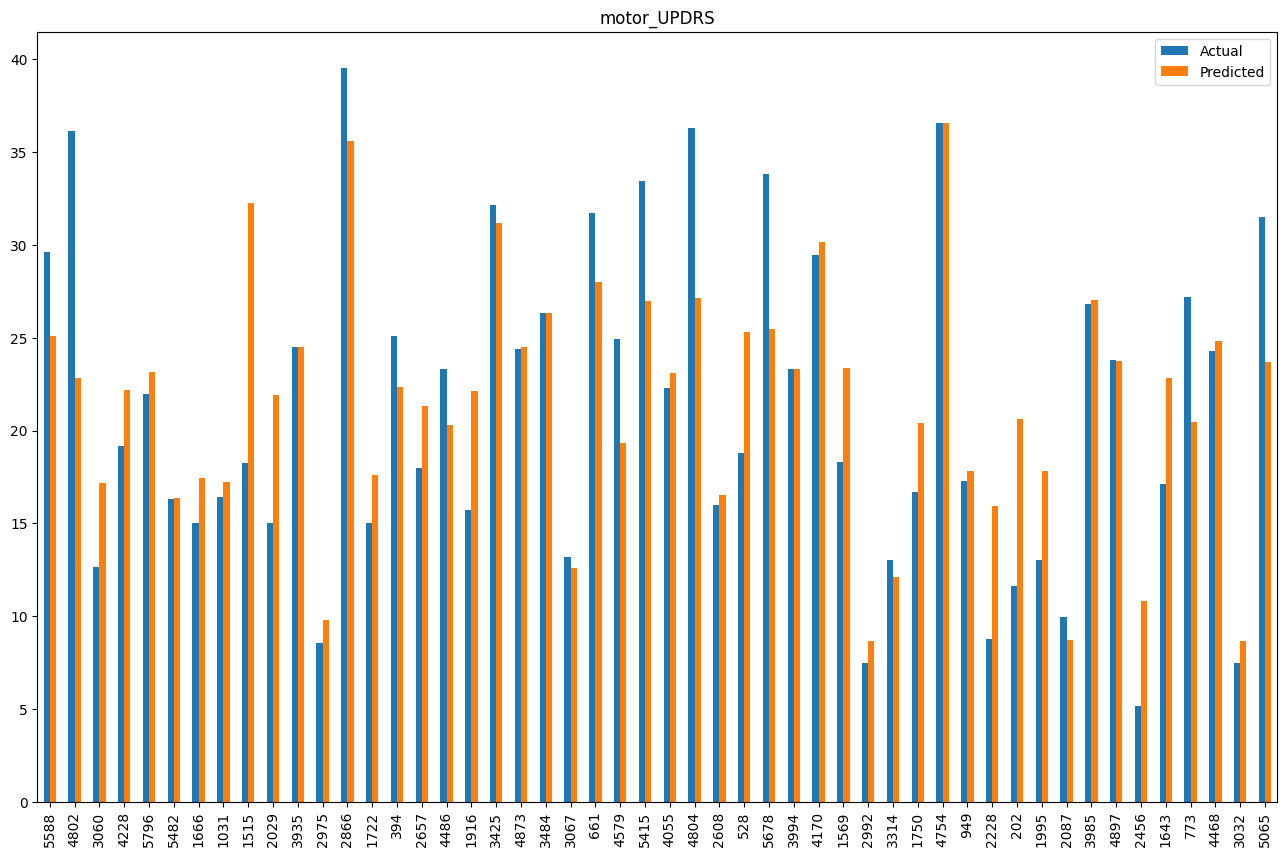

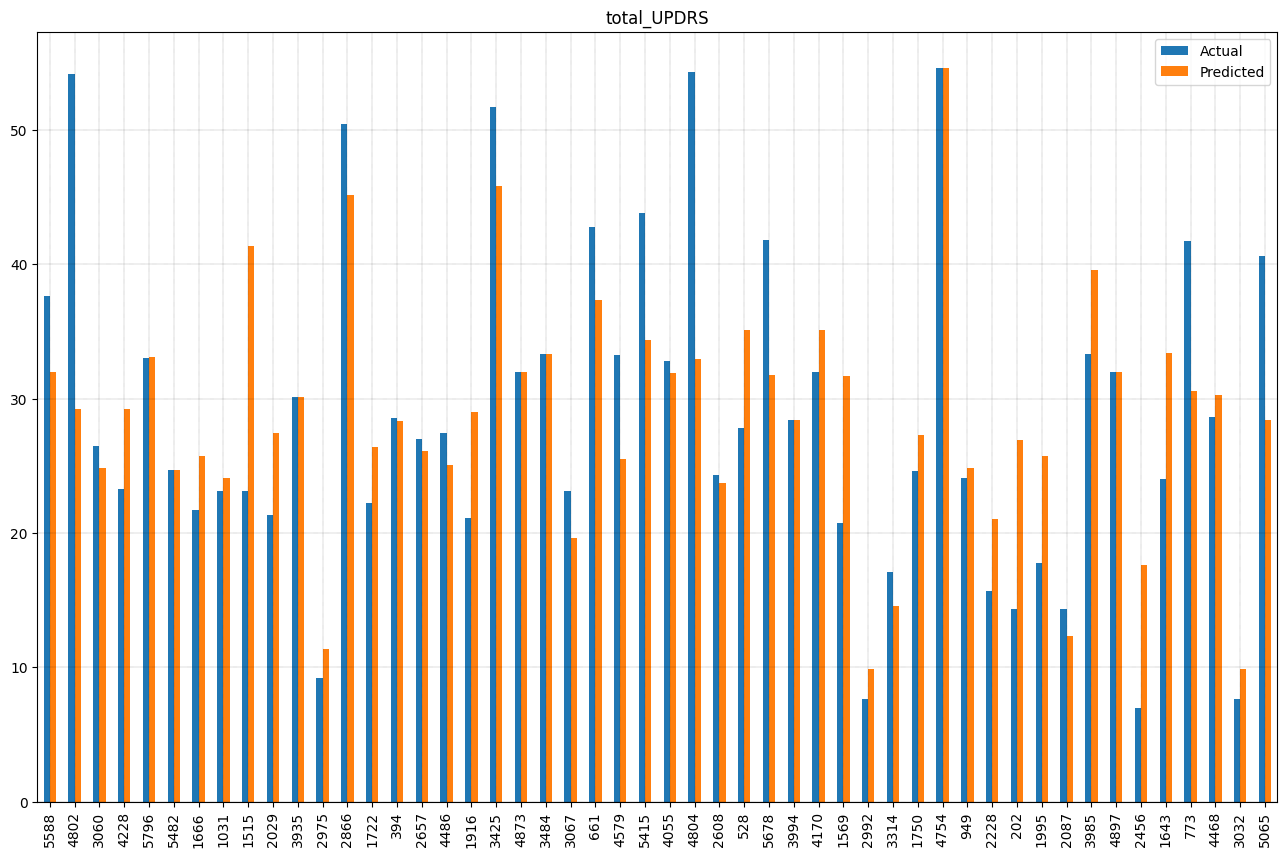

In [100]:
compareM_df = pd.DataFrame({'Actual': yM_test, 'Predicted': yM_pred.flatten()}).head(50)
compareM_df.plot(kind='bar', figsize=(16,10))
plt.title("motor_UPDRS")

compareT_df = pd.DataFrame({'Actual': yT_test, 'Predicted': yT_pred.flatten()}).head(50)
compareT_df.plot(kind='bar', figsize=(16,10))
plt.title("total_UPDRS")

plt.grid(linestyle=':', linewidth='0.25', color='black')
plt.show()

## The diffrences between the 3 Models

# baseline

- Mean absolute error = 5.02
- Mean squared error = 47.25
- Root Mean Squared Error motor_UPDRS = 7.54
- Root Mean Squared Error total_UPDRS = 9.75
- Root Mean Squared Error = 6.87
- R2 score = 0.47

Als we de 3 met elkaar vergelijken kunnen we zien dat onze baseline de slechte van de 3 is, het enige verschil is net iets slechter dan de KNeighborsRegressor in de Root Mean Squared Error motor_UPDRS en Root Mean Squared Error total_UPDRS die bij de baseline minder accuraat zijn.


# DecisionTreeRegressor

- Mean absolute error = 0.51
- Mean squared error = 4.72
- Root Mean Squared Error motor_UPDRS = 2.79
- Root Mean Squared Error total_UPDRS = 3.24
- Root Mean Squared Error = 2.17
- R2 score = 0.95

Als we de 3 met elkaar vergelijken kunnen we zien dat onze DecisionTreeRegressor bij ver de beste is. hij is in alle opzichten een bij ver betere keuzen. Hij is gemiddeld Drie keer zo nauwkeurig als de andere 2 modellen.

# KNeighborsRegressor

- Mean absolute error = 5.02
- Mean squared error = 47.25
- Root Mean Squared Error motor_UPDRS = 5.9
- Root Mean Squared Error total_UPDRS = 7.72
- Root Mean Squared Error = 6.87
- R2 score = 0.47

Als we de 3 met elkaar vergelijken kunnen we zien dat de KNeighborsRegressor de 2de slechtse is, het enige verschil is net iets better is dan de baseline in de Root Mean Squared Error motor_UPDRS en Root Mean Squared Error total_UPDRS die bij de baseline minder accuraat zijn.

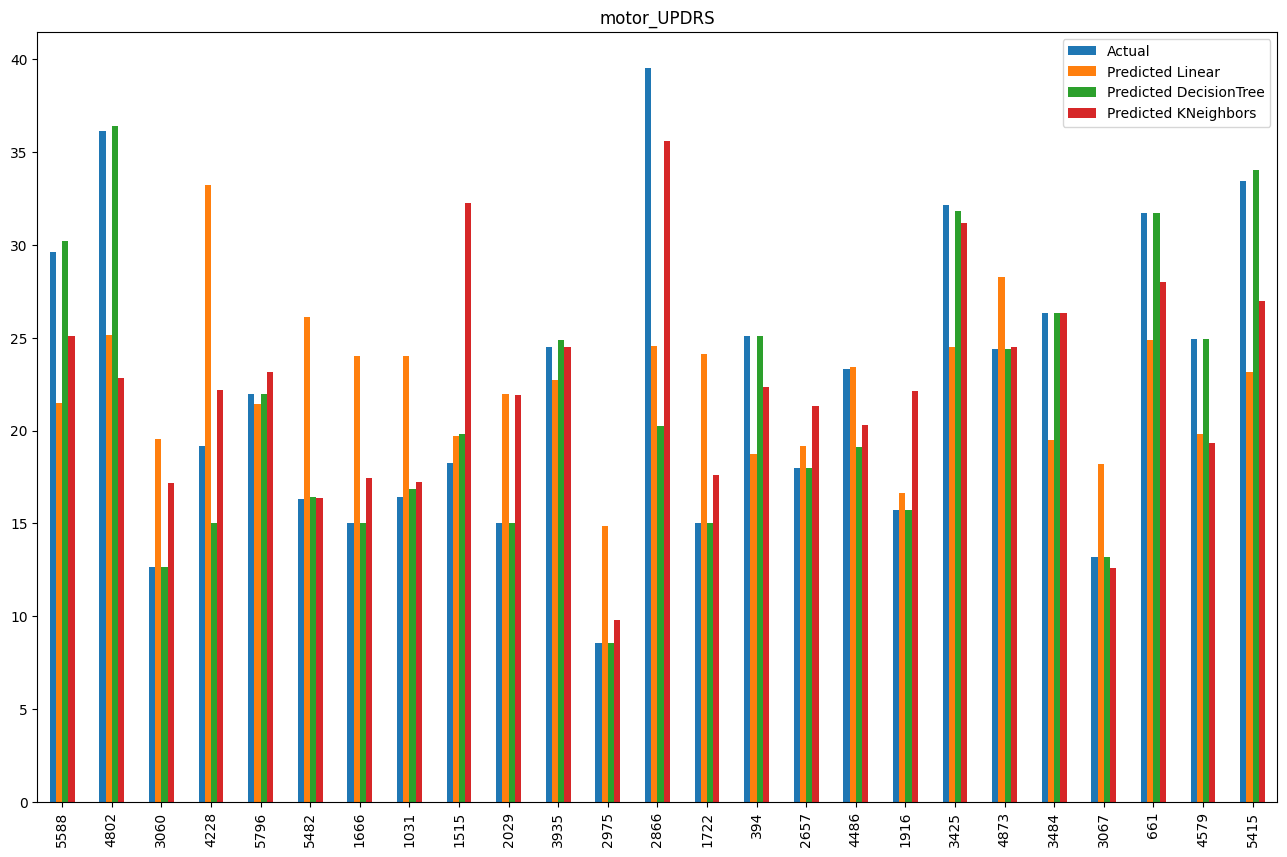

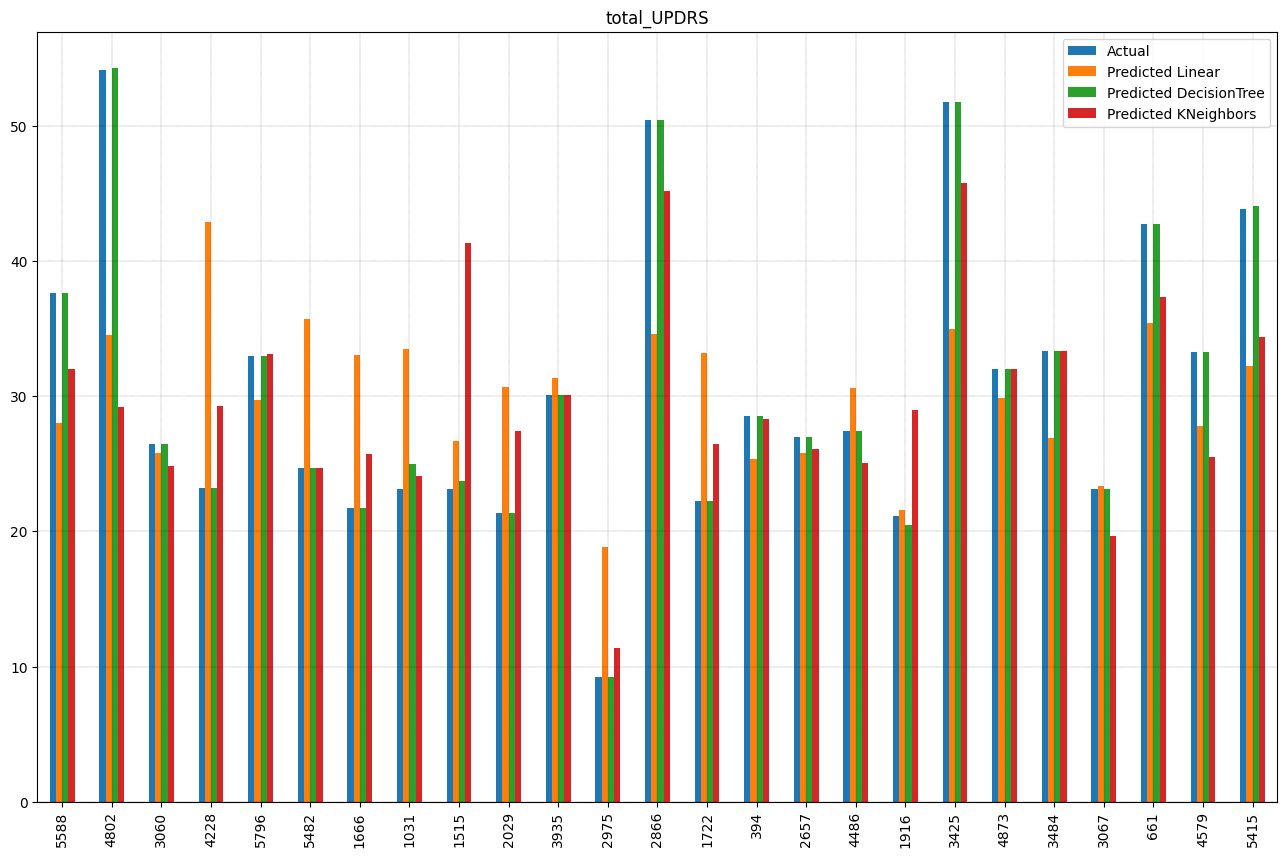

In [101]:
modelLR = LinearRegression()
modelLR.fit(XM_train, yM_train) # training the model
modelLR_yM_pred = modelLR.predict(XM_test)
modelLR.fit(XT_train, yT_train) 
modelLR_yT_pred = modelLR.predict(XT_test)

modelDTR = DecisionTreeRegressor(random_state=1)
modelDTR.fit(XM_train, yM_train) # training the model
modelDTR_yM_pred = modelDTR.predict(XM_test)
modelDTR.fit(XT_train, yT_train) 
modelDTR_yT_pred = modelDTR.predict(XT_test)

modelKn = KNeighborsRegressor()
modelKn.fit(XM_train, yM_train)
modelKn_yM_pred = modelKn.predict(XM_test)
modelKn.fit(XT_train, yT_train) 
modelKn_yT_pred = modelKn.predict(XT_test)

compareM_df = pd.DataFrame({'Actual': yM_test, 'Predicted Linear': modelLR_yM_pred.flatten(), 'Predicted DecisionTree': modelDTR_yM_pred.flatten(), 'Predicted KNeighbors': modelKn_yM_pred.flatten()}).head(25)
compareM_df.plot(kind='bar', figsize=(16,10))
plt.title("motor_UPDRS")

compareT_df = pd.DataFrame({'Actual': yT_test, 'Predicted Linear': modelLR_yT_pred.flatten(), 'Predicted DecisionTree': modelDTR_yT_pred.flatten(), 'Predicted KNeighbors': modelKn_yT_pred.flatten()}).head(25)
compareT_df.plot(kind='bar', figsize=(16,10))
plt.title("total_UPDRS")

plt.grid(linestyle=':', linewidth='0.25', color='black')
plt.show()